In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

from matplotlib.backends.backend_pdf import PdfPages

# What happens when you have a continous variable and lots of categories describing it.  

## Let's use data from tree data that Professor Maenza-Gmelch collects each year in intro.

Here is a map I made of the data. https://bmaillou.github.io/BarnardTrees/

Let's read it in!

In [71]:
df=pd.read_excel('BarnardTrees.xlsx')

In [72]:
df

,Location,old tree number,species,Origin,Lat,Long,Date,DBH_in
0,Broadway,1,pin oak,Native,40.810514,-73.962235,2015-11-01,14.870000
1,Broadway,1,pin oak,Native,40.810514,-73.962235,2016-11-01,15.100000
2,Broadway,1,pin oak,Native,40.810514,-73.962235,2018-11-18,15.483333
3,Broadway,1,pin oak,Native,40.810514,-73.962235,2019-07-01,15.500000
4,Broadway,1,pin oak,Native,40.810514,-73.962235,2020-11-19,15.750000
...,...,...,...,...,...,...,...,...
359,Inside,69,large oak,Native,40.808844,-73.963562,2021-06-21,26.000000
360,Inside,70,large oak,Native,40.808767,-73.963621,2015-11-01,15.200000
361,Inside,70,large oak,Native,40.808767,-73.963621,2016-11-01,15.350000
362,Inside,70,large oak,Native,40.808767,-73.963621,2018-11-18,15.810000


In [73]:
df.describe()

,Lat,Long,DBH_in
count,297.000000,297.000000,364.000000
mean,40.809410,-73.963604,9.439124
std,0.000810,0.000799,6.473284
min,40.808163,-73.964863,1.690000
25%,40.808696,-73.964452,5.195000
50%,40.809218,-73.963490,6.865000
75%,40.810249,-73.962936,12.280000
max,40.810830,-73.962235,30.690000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Location         364 non-null    object        
 1   old tree number  364 non-null    object        
 2   species          364 non-null    object        
 3   Origin           364 non-null    object        
 4   Lat              297 non-null    float64       
 5   Long             297 non-null    float64       
 6   Date             364 non-null    datetime64[ns]
 7   DBH_in           364 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 22.9+ KB


## What do we have?
-  You can look at it in excel
-  For each tree around campus we have it's details and then it's DBH (Diameter Breast Height) (Size) measrued over 5 yers.
-  This is a hard dataset.  we have lots of trees and their size over 5 years.  We can see how trees grow over time.  

### what kind of questions could you ask?
- do native trees have an impact on x?
- does the location have an impact on y?
- does species impact z?


### What do we do first? 
-  First I am going to find the average size of the tree.  Trees are measured as Diameater at Breast Height (4.5') off the ground.  We are going to find the average size over the 5 years then see what we have.

### How do we do this?  
- we are going to use groupby to group each by each tree which is the old tree number
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- you call groupby on your dataframe df.  
- you choose the column to groupby
- you choose what to do for each group
- I am going to find the mean of each group

In [75]:
df.groupby('old tree number').mean()

,Lat,Long,DBH_in
old tree number,,,
1,40.810514,-73.962235,15.427222
2,40.810441,-73.962298,17.830556
3,40.810355,-73.962367,16.419444
4,40.810122,-73.962518,16.093889
5,40.809963,-73.962629,6.537778
...,...,...,...
69,40.808844,-73.963562,25.057333
70,40.808767,-73.963621,15.580000
52a,NaN,NaN,6.850000


### But we lost a lot of data and columns?   
-  How can we keep the non-numeric data?
-  First let me show you some tricks.
-  Where we put mean you can add other functions. https://pandas.pydata.org/docs/reference/groupby.html
-  You can even make your own functions.
-  First lets try count.   It tells you how many of each

In [76]:
df.groupby('old tree number').count()

,Location,species,Origin,Lat,Long,Date,DBH_in
old tree number,,,,,,,
1,6,6,6,6,6,6,6
2,6,6,6,6,6,6,6
3,6,6,6,6,6,6,6
4,6,6,6,6,6,6,6
5,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
69,5,5,5,5,5,5,5
70,4,4,4,4,4,4,4
52a,5,5,5,0,0,5,5


#### You can also do first which just gives you the first one

In [77]:
df.groupby('old tree number').first()

,Location,species,Origin,Lat,Long,Date,DBH_in
old tree number,,,,,,,
1,Broadway,pin oak,Native,40.810514,-73.962235,2015-11-01,14.87
2,Broadway,red oak,Native,40.810441,-73.962298,2015-11-01,16.70
3,Broadway,red oak,Native,40.810355,-73.962367,2015-11-01,15.62
4,Broadway,red oak,Native,40.810122,-73.962518,2015-11-01,15.27
5,Broadway,elm,Native,40.809963,-73.962629,2015-11-01,5.26
...,...,...,...,...,...,...,...
69,Inside,large oak,Native,40.808844,-73.963562,2015-11-01,23.46
70,Inside,large oak,Native,40.808767,-73.963621,2015-11-01,15.20
52a,Claremont,ginkgo,Non-Native,NaN,NaN,2018-11-18,6.79


#### If you add describe it does all the different math

In [78]:
df.groupby('old tree number').describe()

Lat                                                 \
                count       mean           std        min        25%   
old tree number                                                        
1                 6.0  40.810514  7.783606e-15  40.810514  40.810514   
2                 6.0  40.810441  0.000000e+00  40.810441  40.810441   
3                 6.0  40.810355  7.783606e-15  40.810355  40.810355   
4                 6.0  40.810122  0.000000e+00  40.810122  40.810122   
5                 6.0  40.809963  0.000000e+00  40.809963  40.809963   
...               ...        ...           ...        ...        ...   
69                5.0  40.808844  0.000000e+00  40.808844  40.808844   
70                4.0  40.808767  0.000000e+00  40.808767  40.808767   
52a               0.0        NaN           NaN        NaN        NaN   
52b               5.0  40.810331  0.000000e+00  40.810331  40.810331   
new               0.0        NaN           NaN        NaN        NaN   

                                                  Long             ...  \
                       50%        75%        max count       mean  ...   
old tree number                                                    ...   
1                40.810514  40.810514  40.810514   6.0 -73.962235  ...   
2                40.810441  40.810441  40.810441   6.0 -73.962298  ...   
3                40.810355  40.810355  40.810355   6.0 -73.962367  ...   
4                40.810122  40.810122  40.810122   6.0 -73.962518  ...   
5                40.809963  40.809963  40.809963   6.0 -73.962629  ...   
...                    ...        ...        ...   ...        ...  ...   
69               40.808844  40.808844  40.808844   5.0 -73.963562  ...   
70               40.808767  40.808767  40.808767   4.0 -73.963621  ...   
52a                    NaN        NaN        NaN   0.0        NaN  ...   
52b              40.810331  40.810331  40.810331   5.0 -73.963308  ...   
new                    NaN        NaN        NaN   0.0        NaN  ...   

                                      DBH_in                              \
                       75%        max  count       mean       std    min   
old tree number                                                            
1               -73.962235 -73.962235    6.0  15.427222  0.378813  14.87   
2               -73.962298 -73.962298    6.0  17.830556  0.764375  16.70   
3               -73.962367 -73.962367    6.0  16.419444  0.543313  15.62   
4               -73.962518 -73.962518    6.0  16.093889  0.578179  15.27   
5               -73.962629 -73.962629    6.0   6.537778  0.906107   5.26   
...                    ...        ...    ...        ...       ...    ...   
69              -73.963562 -73.963562    5.0  25.057333  1.153532  23.46   
70              -73.963621 -73.963621    4.0  15.580000  0.362675  15.20   
52a                    NaN        NaN    5.0   6.850000  0.039370   6.79   
52b             -73.963308 -73.963308    5.0   7.134000  0.703335   6.29   
new                    NaN        NaN    2.0   2.255000  0.063640   2.21   

                                                         
                       25%        50%        75%    max  
old tree number                                          
1                15.195833  15.491667  15.687500  15.86  
2                17.400000  18.016667  18.158333  18.85  
3                16.050000  16.658333  16.796667  16.89  
4                15.683333  16.266667  16.517500  16.67  
5                 5.854167   6.858333   7.175000   7.45  
...                    ...        ...        ...    ...  
69               24.200000  25.766667  25.860000  26.00  
70               15.312500  15.580000  15.847500  15.96  
52a               6.840000   6.850000   6.880000   6.89  
52b               6.630000   7.150000   7.550000   8.05  
new               2.232500   2.255000   2.277500   2.30  

[71 rows x 24 columns]

### Stick with me!
- we want mean DBH
- we also just want one of the Location, species, Origin,  so we can just take the first for them
- So this means we need to make an agg function https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
- we will do first for the names and means for the others.
- Lets just do species by first and DBH bymean to start.  It is a dictionary so you need squiggly brackets and colons.  
-  it is {'column':'method,'column':'method...}

In [79]:
df.groupby('old tree number').agg({'species':'first', 'DBH_in': 'mean'})

,species,DBH_in
old tree number,,
1,pin oak,15.427222
2,red oak,17.830556
3,red oak,16.419444
4,red oak,16.093889
5,elm,6.537778
...,...,...
69,large oak,25.057333
70,large oak,15.580000
52a,ginkgo,6.850000


#### To make things cleaner
- I like to make a grouper dictionary f that I pass to agg
- you can do multiple functions on any column

In [80]:
f={'species':'first'
   ,'DBH_in': 'mean'
  }

df.groupby('old tree number').agg(f)

,species,DBH_in
old tree number,,
1,pin oak,15.427222
2,red oak,17.830556
3,red oak,16.419444
4,red oak,16.093889
5,elm,6.537778
...,...,...
69,large oak,25.057333
70,large oak,15.580000
52a,ginkgo,6.850000


#### Now lets make our dataset
- there is an error with trying to get the mean date so we will just use first. https://stackoverflow.com/questions/72390629/pandas-groupby-mean-not-working-on-datetime-column

In [81]:
f={'Location':'first'
   ,'species':'first'
   ,'Origin':'first'
   ,'Date':'first'
   ,'Lat':'mean'
   ,'Long':'mean'
   ,'DBH_in': 'mean'
  }
df.dropna(subset=['DBH_in']).groupby('old tree number').agg(f)



,Location,species,Origin,Date,Lat,Long,DBH_in
old tree number,,,,,,,
1,Broadway,pin oak,Native,2015-11-01,40.810514,-73.962235,15.427222
2,Broadway,red oak,Native,2015-11-01,40.810441,-73.962298,17.830556
3,Broadway,red oak,Native,2015-11-01,40.810355,-73.962367,16.419444
4,Broadway,red oak,Native,2015-11-01,40.810122,-73.962518,16.093889
5,Broadway,elm,Native,2015-11-01,40.809963,-73.962629,6.537778
...,...,...,...,...,...,...,...
69,Inside,large oak,Native,2015-11-01,40.808844,-73.963562,25.057333
70,Inside,large oak,Native,2015-11-01,40.808767,-73.963621,15.580000
52a,Claremont,ginkgo,Non-Native,2018-11-18,NaN,NaN,6.850000


### Now we can just save to a new dataframe!

In [82]:
f={'Location':'first'
   ,'species':'first'
   ,'Origin':'first'
   ,'Date':'first'
   ,'Lat':'mean'
   ,'Long':'mean'
   ,'DBH_in': 'mean'
  }
dfG=df.groupby('old tree number').agg(f)

Now we can ask how many trees?

In [83]:
dfG['Location'].count()

71

#### Now we can use value_counts()
- This is a great function.  Just tells us how many of each we have.
- So we can see how many at each street/location

In [84]:
dfG['Location'].value_counts()

Claremont    28
Inside       18
Broadway     17
116th         8
Name: Location, dtype: int64

#### Now we can turn it into a percent!
- I just learned a new trick
- set normalize=True

In [85]:
dfG['Location'].value_counts(normalize=True)*100

Claremont    39.436620
Inside       25.352113
Broadway     23.943662
116th        11.267606
Name: Location, dtype: float64

## Pandas keeps our life easy!  Can we turn that into a bar chart?

Text(0, 0.5, 'Percent')

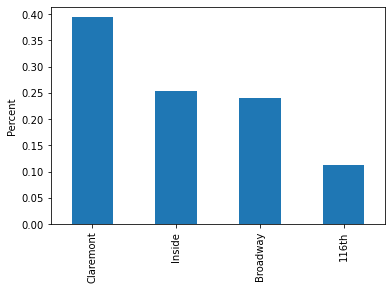

In [86]:
fig,ax=plt.subplots()
dfG['Location'].value_counts(normalize=True).plot.bar(ax=ax)
ax.set_ylabel('Percent')

# Homework Part 1.
- Make a graph showing the percent of each species
- make it look nice!

<AxesSubplot:>

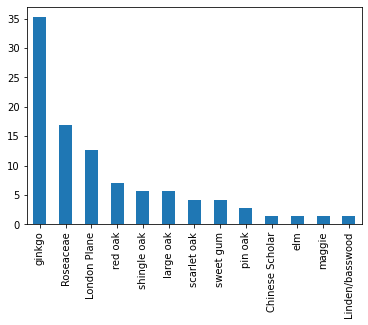

### You can pass two parameters to value_counts.  
- what if you want the amount of origin/native on each street?

In [87]:
dfG[['Location','Origin']].value_counts()

Location   Origin    
Claremont  Non-Native    26
Inside     Non-Native    12
Broadway   Non-Native    10
116th      Native         8
Broadway   Native         7
Inside     Native         6
Claremont  Native         2
dtype: int64

You can covnvert this to a percent also

In [88]:
dfG[['Location','Origin']].value_counts(normalize=True)*100

Location   Origin    
Claremont  Non-Native    36.619718
Inside     Non-Native    16.901408
Broadway   Non-Native    14.084507
116th      Native        11.267606
Broadway   Native         9.859155
Inside     Native         8.450704
Claremont  Native         2.816901
dtype: float64

###  This one will hurt your mind a little
-  I can't make this work with value_counts.  
-  But now we can flip our percentages and see how many native/non native on each block.
-  Use groupby to count the two groups. 
-  then divide by how many in each location.

In [92]:
dfG.groupby(['Location','Origin']).count()/dfG.groupby('Location').count()

DBH_in      Date       Lat      Long  Origin   species
Location  Origin                                                              
116th     Native      1.000000  1.000000  1.000000  1.000000     NaN  1.000000
Broadway  Native      0.411765  0.411765  0.375000  0.375000     NaN  0.411765
          Non-Native  0.588235  0.588235  0.625000  0.625000     NaN  0.588235
Claremont Native      0.071429  0.071429  0.117647  0.117647     NaN  0.071429
          Non-Native  0.928571  0.928571  0.882353  0.882353     NaN  0.928571
Inside    Native      0.333333  0.333333  0.250000  0.250000     NaN  0.333333
          Non-Native  0.666667  0.666667  0.750000  0.750000     NaN  0.666667

### What if we want the distribution of DBH.  Describe does well but we can also do the pandas boxplot.

<AxesSubplot:>

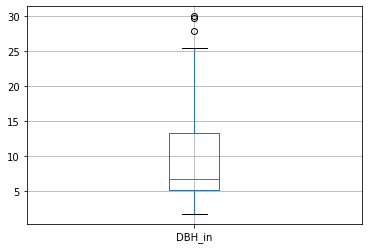

In [94]:
fig,ax=plt.subplots()
dfG.boxplot(column=['DBH_in'],ax=ax)

### Do you remember now how to show the DBH but split by the categorical column Location?  We have done it before!

<AxesSubplot:title={'center':'DBH_in'}, xlabel='Location'>

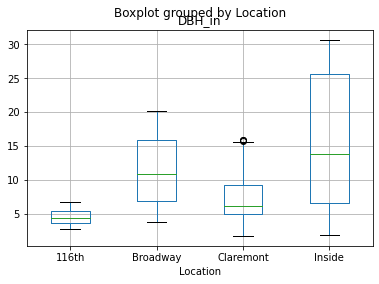

### Now what if we actually want the mean values of each of those in a table?  
-  Go back and use groupby again
-  Find the mean for each location


In [95]:
dfG.groupby('Location').mean()

,Lat,Long,DBH_in
Location,,,
116th,40.808281,-73.964527,4.481667
Broadway,40.809565,-73.962926,11.367072
Claremont,40.809498,-73.964137,6.589449
Inside,40.809955,-73.963093,15.575435


### But we don't need the Lat and Long.  We just want the mean of DBH

In [100]:
dfG.groupby('Location')['DBH_in'].mean()

Location
116th         4.481667
Broadway     11.367072
Claremont     6.589449
Inside       15.575435
Name: DBH_in, dtype: float64

### What if you want the max?

In [101]:
dfG.groupby('Location')['DBH_in'].max()

Location
116th         5.996667
Broadway     20.054000
Claremont    15.706000
Inside       29.927333
Name: DBH_in, dtype: float64

### Can we just use describe?

In [102]:
dfG.groupby('Location')['DBH_in'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
116th,8.0,4.481667,1.067620,3.065000,3.689028,4.199722,5.422361,5.996667
Broadway,17.0,11.367072,5.047611,4.399444,6.616667,11.043333,16.093889,20.054000
Claremont,28.0,6.589449,3.567952,1.732500,4.966071,5.789464,9.135060,15.706000
Inside,18.0,15.575435,9.654067,1.890000,6.499625,14.242500,25.021333,29.927333


### If you wanted to save the data just send to_excel.

In [103]:
dfG.groupby('Location')['DBH_in'].describe().to_excel('Grouped_by_location.xlsx')

## Anova
If you want to see if the differences between the groups is significant you do an anova.  If it is two groups you do a t-test.  If it is more than two groups you do an Anova.  
- One-way anova tells you if there is a signgicant difference among groups.
- it does not tell you which groups.  
- Again it is the p-value we want!
- I can't explain this code very well but it is slick and works.  
- The stats.f_oneway needs a numpy array.  so you use groupby to make the arrays.  Then make seperate columns
- then you run the stats.
- Then I pring the stats
- This is the format samples = [cols[1] for cols in df.groupby(col_to_group)[col_for_data]] 

In [104]:
col_for_data='DBH_in'
col_to_group='Location'

samples = [cols[1] for cols in dfG.groupby(col_to_group)[col_for_data]]   
f_val, p_val = stats.f_oneway(*samples) 
print('F value: {:.3f}, p value: {:.3f}\n'.format(f_val, p_val))


F value: 11.025, p value: 0.000



### Now if p<0.05 you can do a post-hoc test
- a post-hoc test compares the groups and figures out which one is significant.
- use the same format. mod = MultiComparison(df[col_for_data], df[col_to_group])

In [105]:
col_for_data='DBH_in'
col_to_group='Location'
mod = MultiComparison(df[col_for_data], df[col_to_group])
thsd=mod.tukeyhsd()
    
print(mod.tukeyhsd())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    116th  Broadway   6.7449  0.001  4.3597  9.1302   True
    116th Claremont   2.3864 0.0337  0.1283  4.6446   True
    116th    Inside   11.293  0.001  8.7399 13.8461   True
 Broadway Claremont  -4.3585  0.001 -6.1193 -2.5977   True
 Broadway    Inside    4.548  0.001  2.4222  6.6739   True
Claremont    Inside   8.9065  0.001  6.9243 10.8888   True
----------------------------------------------------------


### The results tell you which one is different.  R does this better and automatically shows it on a graph.
-  But True means you reject the null hypothesis. 
-  meandiff tells you the difference in the means between groups.
-  p-adj tells you the p-value of that meandiff.  so if it is significant
-  lower and upper gives the 95% confidence range of the meandiff
-  reject tells us if we can reject the null hypothesis.  So if p-adj<0.05 it is True

## The next thing you can do is a groupby loop.  Again weird.
- It creates a for loop.  But each time through it gives you everything in a group.  
- it returns the group name and a dataframe for just that group.  
- It is convenient for making graphs in subgroups
- let's try.
- We will print the name and the mean for each group.


-  Go back and read in the data so we have all the years data
-  Now each tree will have at least 5 years of data

In [ ]:
df=pd.read_excel('BarnardTrees.xlsx')

#### We are going to loop over Location
-  it will go through each location.
-  It gives you the group name which I called grp
-  It gives all the data of that group in dfG. which I used for dataframe of the group

In [106]:
for grp, dfG in df.groupby('Location'):
    print (grp)


116th
Broadway
Claremont
Inside


Just like before I am going to get the mean of each group.  This is redundant with what we did before.  But stay with me.

In [107]:
for grp, dfG in df.groupby('Location'):
    print (grp, dfG['DBH_in'].mean())


116th 4.4816666666666665
Broadway 11.226599999999998
Claremont 6.868102040816327
Inside 15.774637681159424


### Stay with me.  Let's switch and do it for old tree number.  So each tree becomes a group.  Then lets plot it versus time.....

I just commented them out because otherwise it takes a lot of pages to print.   uncomment and run!!!!

In [117]:
for grp, dfG in df.groupby('old tree number'):
    #fig,ax=plt.subplots()
    #ax.scatter(dfG['Date'],dfG['DBH_in'])


SyntaxError: unexpected EOF while parsing (<ipython-input-117-3e5df88b48ef>, line 3)

## That was cool.  
### Did you see what you just did?   
-  In one fell swoop you made a graph of DBH over time for each tree.
-  It went through each group one by one and we made a graph.

I want the growth rate for each tree.  This is a reach. 
- Growth rate of trees is time versus DBH.  
- First we are going to make a decimal year.  Go down to the last answer here.
https://stackoverflow.com/questions/6451655/how-to-convert-python-datetime-dates-to-decimal-float-years
- linregress hates datetimes.  So we need to make the decimal year for the x-axis so we can then do a regression


In [112]:
from astropy.time import Time

In [113]:
df['Year']=Time(df['Date']).decimalyear

In [114]:
df['Year']

0      2015.832877
1      2016.833333
2      2018.879452
3      2019.495890
4      2020.882514
          ...     
359    2021.468493
360    2015.832877
361    2016.833333
362    2018.879452
363    2020.882514
Name: Year, Length: 364, dtype: float64

## I actually just figured that our and our life just got really simple!
- We are going to make a pdf
- one tree per page
- Each tree we will compute the growth rate!
- We will open a pdf
- we will ax.scatter
- we will save
- clear axes
- print the growth rate and p-value
- plot points and best fit line on graph
- intercept not needed
- I will add a title to each figure with the tree id and species
- grp is the tree id and dfG['species'].iloc[0] is the species as you just take the first one
- you will need linregress.  I did results=stats.linregress(dfG[['Year','DBH_in']].dropna())
- for my x_fit I did x_fit=np.array([dfG.Year.min(),dfG.Year.max()])
- Your homework is to hand in the pdf.
- You have almost done all of this before.  Just think what goes where!  It wrecked my mind a bit.  
- ignore the warnings!
- Add your name somewhere to each graph!!!
- My answer is online

/Users/bmaillou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/bmaillou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/bmaillou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


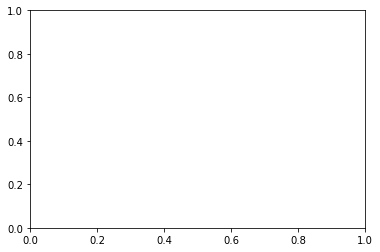

#### IGNORE BELOW THIS

In [84]:
def tukeyLetters(pp, means=None, alpha=0.05):
    '''TUKEYLETTERS - Produce list of group labels for TukeyHSD
    letters = TUKEYLETTERS(pp), where PP is a symmetric matrix of 
    probabilities from a Tukey test, returns alphabetic labels
    for each group to indicate clustering. PP may also be a vector
    from PAIRWISE_TUKEYHSD.
    Optional argument MEANS specifies group means, which is used for
    ordering the letters. ("a" gets assigned to the group with lowest
    mean.) Without this argument, ordering is arbitrary.
    Optional argument ALPHA specifies cutoff for treating groups as
    part of the same cluster.'''

    if len(pp.shape)==1:
        # vector
        G = int(3 + np.sqrt(9 - 4*(2-len(pp))))//2
        ppp = .5*np.eye(G)
        ppp[np.triu_indices(G,1)] = pp    
        pp = ppp + ppp.T
    conn = pp>alpha
    G = len(conn)
    if np.all(conn):
        return ['a' for g in range(G)]
    conns = []
    for g1 in range(G):
        for g2 in range(g1+1,G):
            if conn[g1,g2]:
                conns.append((g1,g2))

    letters = [ [] for g in range(G) ]
    nextletter = 0
    for g in range(G):
        if np.sum(conn[g,:])==1:
            letters[g].append(nextletter)
            nextletter += 1
    while len(conns):
        grp = set(conns.pop(0))
        for g in range(G):
            if all(conn[g, np.sort(list(grp))]):
                grp.add(g)
        for g in grp:
            letters[g].append(nextletter)
        for g in grp:
            for h in grp:
                if (g,h) in conns:
                    conns.remove((g,h))
        nextletter += 1

    if means is None:
        means = np.arange(G)
    means = np.array(means)
    groupmeans = []
    for k in range(nextletter):
        ingroup = [g for g in range(G) if k in letters[g]]
        groupmeans.append(means[np.array(ingroup)].mean())
    ordr = np.empty(nextletter, int)
    ordr[np.argsort(groupmeans)] = np.arange(nextletter)
    result = []
    for ltr in letters:
        lst = [chr(97 + ordr[x]) for x in ltr]
        lst.sort()
        result.append(''.join(lst))
    return result

In [85]:
#tuk = pairwise_tukeyhsd(data, group) 
letters = tukeyLetters(thsd.pvalues)

In [86]:
letters

['a', 'b', 'c', 'd']